### Refugee Movement Around the World Analysis

https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-08-22/readme.md

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
population = pd.read_csv('population.csv')

In [4]:
population.columns
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               64809 non-null  int64  
 1   coo_name           64809 non-null  object 
 2   coo                64809 non-null  object 
 3   coo_iso            64809 non-null  object 
 4   coa_name           64809 non-null  object 
 5   coa                64809 non-null  object 
 6   coa_iso            64809 non-null  object 
 7   refugees           64809 non-null  int64  
 8   asylum_seekers     64809 non-null  int64  
 9   returned_refugees  64809 non-null  int64  
 10  idps               64809 non-null  int64  
 11  returned_idps      64809 non-null  int64  
 12  stateless          64809 non-null  int64  
 13  ooc                64809 non-null  int64  
 14  oip                100 non-null    float64
 15  hst                5964 non-null   float64
dtypes: float64(2), int64(8

##### Columns to exclude (missing majority of info)
oip : number of people in need of international protection <br>
hst : the number of host community members

In [5]:
population.year.value_counts()

2022    5930
2021    5587
2020    5491
2019    5439
2018    5264
2017    5125
2015    4938
2016    4927
2014    4746
2013    4568
2012    4364
2010    4216
2011    4214
Name: year, dtype: int64

In [6]:
origin_country_dict = dict(zip(population['coo'], population['coo_name']))
asylum_country_dict = dict(zip(population['coa'], population['coa_name']))

num_coo = len(origin_country_dict)
num_coa = len(asylum_country_dict)

print(f'number of unique origin countries: {num_coo} \nnumber of unique asylum countries: {num_coa}')
# origin_country_dict

number of unique origin countries: 210 
number of unique asylum countries: 189


In [7]:
pop_2020 = population[population['year'] == 2020].groupby(['coo', 'year']).sum().reset_index()
sorted_result = pop_2020.sort_values(by='refugees', ascending=False)
top10_2020 = sorted_result.head(10)
top10_2020.columns

Index(['coo', 'year', 'refugees', 'asylum_seekers', 'returned_refugees',
       'idps', 'returned_idps', 'stateless', 'ooc', 'oip', 'hst'],
      dtype='object')

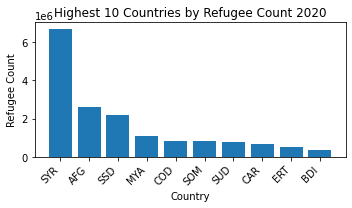

In [8]:
plt.figure(figsize=(5, 3))
plt.bar(top10_2020['coo'], top10_2020['refugees'])
plt.xlabel('Country')
plt.ylabel('Refugee Count')
plt.title('Highest 10 Countries by Refugee Count 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
pop_2020_a = population[population['year'] == 2020].groupby(['coa', 'year']).sum().reset_index()
sorted_result_a = pop_2020_a.sort_values(by='asylum_seekers', ascending=False)
top10_2020_a = sorted_result_a.head(10)
top10_2020_a
# top10_2020_a.columns

,coa,year,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
170,USA,2020,340846,997996,0,0,0,47,0,0.0,0.0
127,PER,2020,4272,537552,0,0,0,0,0,515039.0,500353.0
165,TUR,2020,3652362,322188,18155,0,0,0,0,0.0,0.0
59,GFR,2020,1210596,243157,50,0,0,26675,0,0.0,0.0
23,BRA,2020,59092,202661,0,0,0,14,0,163754.0,0.0
134,RSA,2020,76729,173461,19,0,0,0,0,0.0,0.0
54,FRA,2020,436055,118137,0,0,0,2068,1606,0.0,0.0
143,SPA,2020,103624,103385,0,0,0,5914,5904,0.0,0.0
39,COS,2020,9593,89744,0,0,0,199,0,22401.0,0.0
29,CAN,2020,109214,85352,0,0,0,4139,0,0.0,0.0


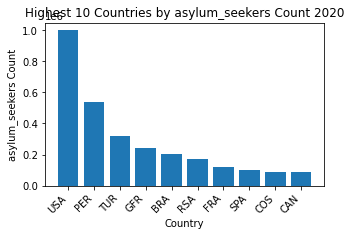

In [10]:
plt.figure(figsize=(5, 3))
plt.bar(top10_2020_a['coa'], top10_2020_a['asylum_seekers'])
plt.xlabel('Country')
plt.ylabel('asylum_seekers Count')
plt.title('Highest 10 Countries by asylum_seekers Count 2020')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

In [13]:
syria_df = population[(population['coo'] == 'SYR') & (population['year'] == 2010)]
syria_df

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
73,2010,Syrian Arab Rep.,SYR,SYR,Egypt,ARE,EGY,8,0,0,0,0,0,0,NaN,NaN
227,2010,Syrian Arab Rep.,SYR,SYR,Australia,AUL,AUS,68,16,0,0,0,0,0,NaN,NaN
317,2010,Syrian Arab Rep.,SYR,SYR,Austria,AUS,AUT,505,471,0,0,0,0,0,NaN,NaN
425,2010,Syrian Arab Rep.,SYR,SYR,Belgium,BEL,BEL,229,0,0,0,0,0,0,NaN,NaN
561,2010,Syrian Arab Rep.,SYR,SYR,Brazil,BRA,BRA,5,0,0,0,0,0,0,NaN,NaN
618,2010,Syrian Arab Rep.,SYR,SYR,Bulgaria,BUL,BGR,95,30,0,0,0,0,0,NaN,NaN
781,2010,Syrian Arab Rep.,SYR,SYR,Canada,CAN,CAN,545,221,0,0,0,0,0,NaN,NaN
999,2010,Syrian Arab Rep.,SYR,SYR,Cyprus,CYP,CYP,125,242,0,0,0,0,0,NaN,NaN
1048,2010,Syrian Arab Rep.,SYR,SYR,Czechia,CZE,CZE,23,36,0,0,0,0,0,NaN,NaN
1118,2010,Syrian Arab Rep.,SYR,SYR,Denmark,DEN,DNK,750,483,0,0,0,0,0,NaN,NaN


In [11]:
# Syrian Refugee Annual Counts
syria_df = population[population['coo'] == 'SYR'].groupby(['year']).sum().reset_index()
# sorted_result_a = pop_2020_a.sort_values(by='asylum_seekers', ascending=False)
# top10_2020_a = sorted_result_a.head(10)
# top10_2020_a
# top10_2020_a.columns
syria_df

,year,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
0,2010,18451,9739,0,0,0,0,0,0.0,0.0
1,2011,19931,14441,0,0,0,0,14110,0.0,0.0
2,2012,729011,26016,68573,2016500,0,0,6900,0.0,0.0
3,2013,2468323,41019,140761,6520800,0,0,9400,0.0,0.0
4,2014,3887490,79649,0,7632500,0,0,1992,0.0,0.0
5,2015,4873236,245857,188,6563462,0,0,8247,0.0,0.0
6,2016,5524511,184337,0,6325978,600000,0,8516,0.0,0.0
7,2017,6310498,147179,77212,6150005,597152,0,8596,0.0,0.0
8,2018,6654374,139576,210946,6183920,0,0,8453,0.0,0.0
9,2019,6615249,118450,94981,6146994,477360,0,7612,0.0,0.0
